# Python и статистика

Проект №1 - пример обзора данных, с определением (агрегацией) простых свойств (средние, суммы) и постройкой графиков.

## Импорт библиотек и настройка среды

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Дополнительные функции для улучшения отображения:

In [3]:
def cols_word(n_cols: int) :
    if (n_cols % 100 > 10) and (n_cols % 100 < 20) :
        return ('колонок')
    elif (n_cols % 10 == 1) :
        return('колонка')
    elif (n_cols % 10 in [2, 3, 4]) :
        return('колонки')
    else :
        return('колонок')

def rows_word(n_rows: int) :
    if (n_rows % 100 > 10) and (n_rows % 100 < 20) :
        return ('колонок')
    elif (n_rows % 10 == 1) :
        return('строка')
    elif (n_rows % 10 in [2, 3, 4]) :
        return('строки')
    else :
        return('строк')

## Загрузка и предварительный обзор данных

In [4]:
df = pd.read_csv('./data/games.csv')

In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Проверка типов данных:

In [8]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Проверка на дубликаты и отсутствующие значения:

In [9]:
a0 = df.shape[0]
a1 = df.shape[1]
a2 = df.dropna().shape[0]
a3 = df.drop_duplicates().shape[0]

print(a0, rows_word(a0), "и", a1, cols_word(a1))
print(a2, rows_word(a2), "после удаления строк, содержащих NULL")
print(a3, rows_word(a3), "после удаления дубликатов")

16598 строк и 11 колонок
16291 строка после удаления строк, содержащих NULL
16598 строк после удаления дубликатов


In [10]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Удаление строк с пропущенными значениями:

In [11]:
df = df.dropna()

Общее количество изданных игр за все годы:

In [90]:
total_releases = df.shape[0]
total_releases

16291

## Распределение количества выпущенных игр с разбивкой по годам и платформам

In [74]:
annual_releases = \
    df \
    .groupby(['Year','Platform'], as_index = [False, False]) \
    .agg({'Name': 'count'}) \
    .rename(columns = {'Name': 'Releases'})

In [75]:
annual_releases.head()

Releases
Year   Platform          
1980.0 2600             9
1981.0 2600            46
1982.0 2600            36
1983.0 2600            11
       NES              6

<AxesSubplot:xlabel='Year', ylabel='Releases'>

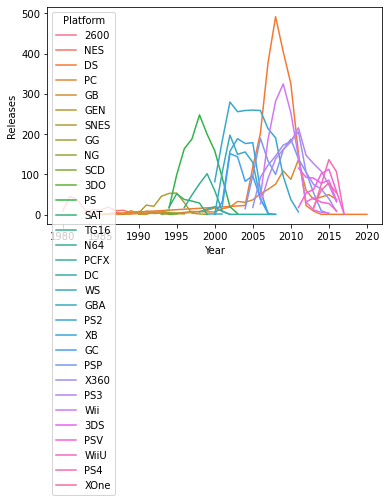

In [76]:
sns.lineplot(data = annual_releases, x = 'Year', y = 'Releases', hue = 'Platform')

Распределение по платформам:

In [77]:
games_by_platfrorms = \
    annual_distribution \
    .reset_index() \
    .groupby('Platform', as_index = False) \
    .agg({'Releases': 'sum'}) \
    .sort_values('Releases', ascending = False) \
    .reset_index(drop = True)

,Platform,Releases
0,DS,2131
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1234


In [91]:
games_by_platfrorms['Releases_pc'] = \
    round(100 * games_by_platfrorms['Releases'] / total_releases, 1)

In [92]:
games_by_platfrorms.query("Releases_pc > 7")

,Platform,Releases,Releases_pc
0,DS,2131,13.1
1,PS2,2127,13.1
2,PS3,1304,8.0
3,Wii,1290,7.9
4,X360,1234,7.6
5,PSP,1197,7.3
6,PS,1189,7.3


In [93]:
games_by_platfrorms.query("Releases_pc > 7")['Platform'].to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

## Распределение изданных игр по годам без разбивки на платформы

<AxesSubplot:xlabel='Year', ylabel='Releases'>

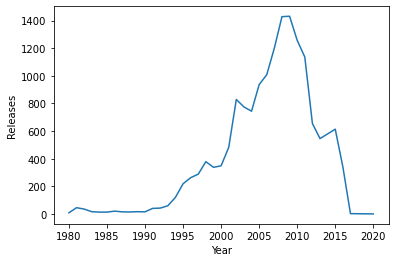

In [94]:
annual_releases_by_year = \
    df \
    .groupby(['Year'], as_index = False) \
    .agg({'Name': 'count'}) \
    .rename(columns = {'Name': 'Releases'})

sns.lineplot(data = annual_releases_by_year, x = 'Year', y = 'Releases')

In [65]:
annual_releases_by_year.head()

,Year,Releases
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


Вычисляем значения мод:

In [32]:
df['Year'].mode()

0    2009.0
dtype: float64

Здесь мы считаем не то:

Вычисляем медиану:

In [33]:
df['Year'].median()

2007.0

In [66]:
annual_releases_by_year[annual_releases_by_year.Releases == annual_releases_by_year.Releases.median()]

,Year,Releases
17,1997.0,289


Вычисляем среднее:

In [43]:
round(df['Year'].mean(),0)

2006.0

In [68]:
annual_releases_by_year_mean = annual_releases_by_year.Releases.mean()

In [70]:
annual_releases_by_year[abs(annual_releases_by_year.Releases - annual_releases_by_year_mean) < 75]

,Year,Releases
18,1998.0,379
20,2000.0,349
21,2001.0,482


Определяем общее число продаж и год, к которому было продано около половины из всех этих игр:

In [95]:
total_releases

16291

In [72]:
annual_releases_by_year['Releases_Cumulative'] = \
    annual_releases_by_year['Releases'].cumsum()

In [73]:
annual_releases_by_year.query("Year >= 2007 & Year <= 2009")

,Year,Releases,Releases_Cumulative
27,2007.0,1201,8298
28,2008.0,1428,9726
29,2009.0,1431,11157


### Распределение количества выпущенных игр с разбивкой по издателям

Игры каких издателей (Publisher) встречаются в датасете чаще всего:

In [100]:
releases_by_publisher = \
    df \
    .groupby(['Publisher'], as_index = False) \
    .agg({'Name': 'count'}) \
    .rename(columns = {'Name': 'Releases'}) \
    .sort_values('Releases', ascending = False) \
    .reset_index(drop = True)
releases_by_publisher

,Publisher,Releases
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
...,...,...
571,Ertain,1
572,Epic Games,1
573,Seventh Chord,1
574,Enjoy Gaming ltd.,1


## Обзор игр от Nintendo

Посчитаем среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (`NA`, `EU`, `JP`, `Other`).

In [104]:
df_nintendo = df.query("Publisher == 'Nintendo'")

In [131]:
pd.DataFrame({'NA_Sales': df_nintendo['NA_Sales'].describe().loc[['mean','std','50%']],
              'EU_Sales': df_nintendo['EU_Sales'].describe().loc[['mean','std','50%']],
              'JP_Sales': df_nintendo['JP_Sales'].describe().loc[['mean','std','50%']],
              'Other_Sales': df_nintendo['Other_Sales'].describe().loc[['mean','std','50%']]}) \
    .T.rename(columns = {'50%': 'median'})

,mean,std,median
NA_Sales,1.172055,2.989913,0.375
EU_Sales,0.601006,1.743953,0.120
JP_Sales,0.653721,1.063110,0.280
Other_Sales,0.136767,0.464170,0.030


Посмотрим на продажи Nintendo в Японии по жанрам.

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

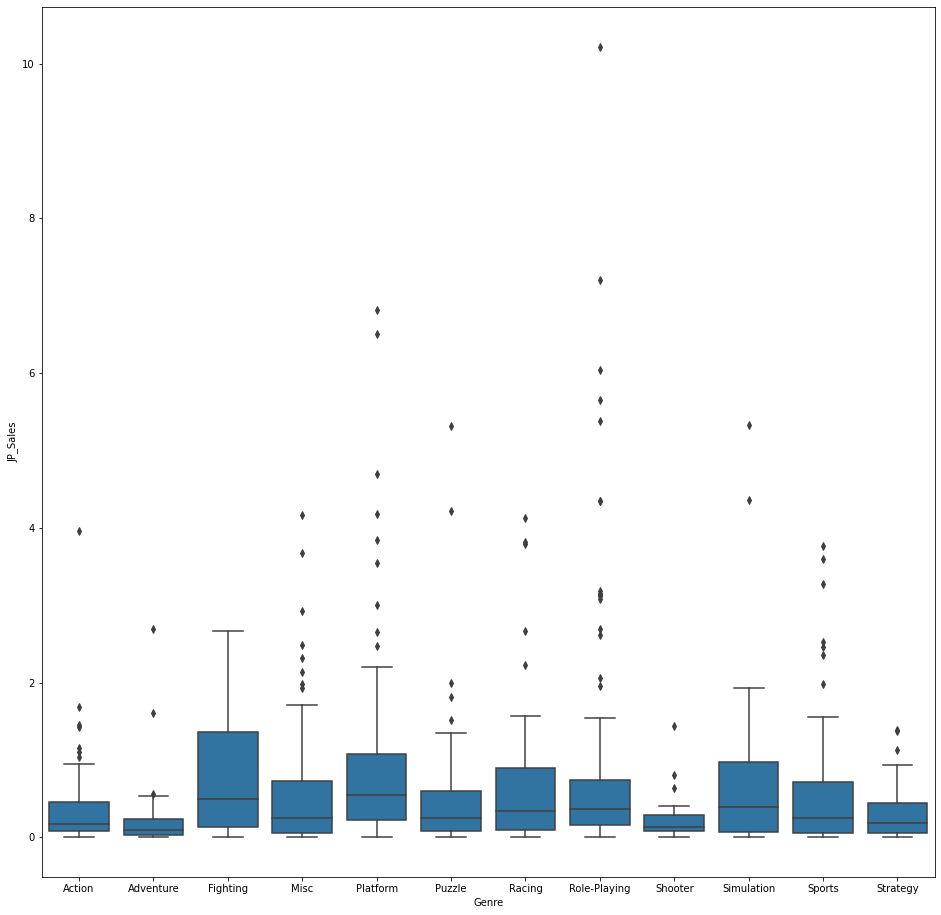

In [145]:
plt.figure(figsize=(16,16))
sns.boxplot(data = df_nintendo.sort_values(['Genre', 'Year']),
            x = 'Genre',
            y = 'JP_Sales',
            color = 'tab:blue')

In [149]:
df_nintendo.query("Genre == 'Fighting'")['JP_Sales'].describe()

count    18.000000
mean      0.830000
std       0.843529
min       0.000000
25%       0.132500
50%       0.500000
75%       1.365000
max       2.660000
Name: JP_Sales, dtype: float64

In [150]:
df_nintendo.query("Genre == 'Simulation'")['JP_Sales'].describe()

count    28.000000
mean      0.844643
std       1.269434
min       0.000000
25%       0.072500
50%       0.390000
75%       0.967500
max       5.330000
Name: JP_Sales, dtype: float64

## Динамика изменения объёма мировых продаж

Визуализируем динамику изменения объема мировых продаж (`Global_Sales`) по годам для игр Nintendo следующих жанров: `Fighting`, `Simulation`, `Platform`, `Racing`, `Sports`.

In [163]:
sales_dynamics = \
    df_nintendo \
    .query(\
            " (Genre == 'Fighting') \
            | (Genre == 'Simulation') \
            | (Genre == 'Platform') \
            | (Genre == 'Racing') \
            | (Genre == 'Sports')") \
    .groupby(['Year', 'Genre'], as_index = False) \
    .agg({'Global_Sales': 'sum'}) \
    .sort_values(['Year', 'Genre'])

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

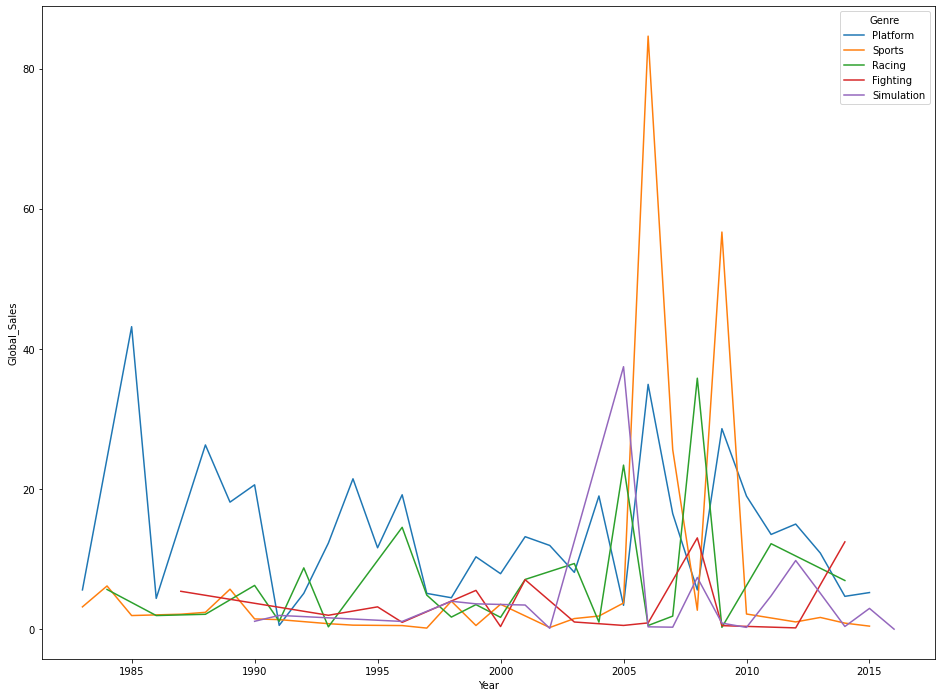

In [164]:
plt.figure(figsize=(16,12))
sns.lineplot(data = sales_dynamics, 
             x = 'Year',
             y = 'Global_Sales',
             hue = 'Genre')